Text(0.5,1,'S&P500 Weekly Closing Index')

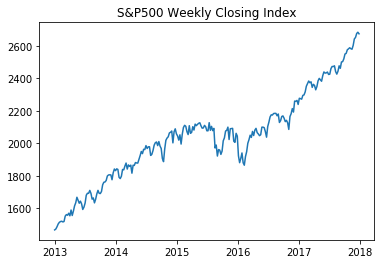

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn
import warnings
warnings.filterwarnings('ignore')
%load_ext rpy2.ipython
%matplotlib inline

df = pd.read_csv('D:/data/sp500-weekly.csv', index_col = 'Date')
df.index = pd.to_datetime(df.index)
df = df.drop('Adj Close', 1)
ts = df['Close']
plt.plot(ts)
plt.title('S&P500 Weekly Closing Index')

Text(0.5,1,'Log Transformation')

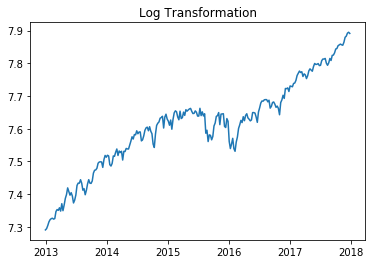

In [2]:
ts_log = np.log(ts)
plt.plot(ts_log)
plt.title("Log Transformation")

Text(0.5,1,'Log Differencing')

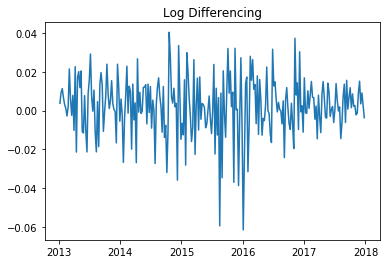

In [3]:
ts_log_diff = ts_log.diff(1)
ts_log_diff.dropna(inplace = True)
plt.plot(ts_log_diff)
plt.title("Log Differencing")

In [4]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import statsmodels


def draw_trend(timeSeries, size):
    f = plt.figure(facecolor='white')
    rol_mean = timeSeries.rolling(window=size).mean()
    rol_weighted_mean = timeSeries.ewm(span=12,min_periods=0,
                                   adjust=True,ignore_na=False).mean()
    rol_std = timeSeries.rolling(window = size).std()


    timeSeries.plot(color='blue', label='Original')
    rol_mean.plot(color='red', label='Rolling Mean')
    rol_weighted_mean.plot(color='black', label='Weighted Rolling Mean')
    rol_std.plot(color = 'green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show()

def draw_ts(timeSeries):
    f = plt.figure(facecolor='white')
    timeSeries.plot(color='blue')
    plt.show()

'''
　　Unit Root Test
   The null hypothesis of the Augmented Dickey-Fuller is that there is a unit
   root, with the alternative that there is no unit root. That is to say the
   bigger the p-value the more reason we assert that there is a unit root
'''
def testStationarity(ts):
    dftest = adfuller(ts)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',
                                             'p-value','#Lags Used',
                                             'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

def draw_acf_pacf(ts, lags=31):
    plot_acf(ts, lags=lags)
    plot_pacf(ts, lags=lags)
    plt.show()

In [5]:
testStationarity(ts_log_diff)

Test Statistic                -7.856133e+00
p-value                        5.436661e-12
#Lags Used                     6.000000e+00
Number of Observations Used    2.530000e+02
Critical Value (1%)           -3.456464e+00
Critical Value (5%)           -2.873033e+00
Critical Value (10%)          -2.572895e+00
dtype: float64

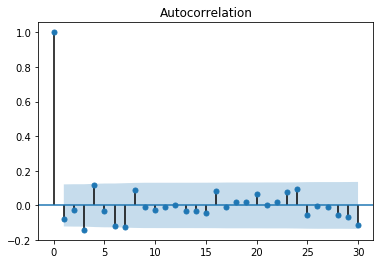

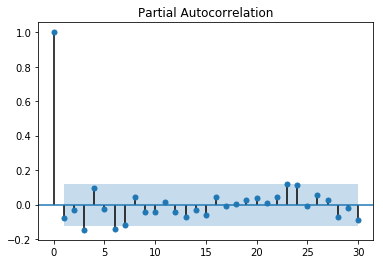

In [7]:
plot_acf(ts_log_diff, lags = 30)
plt.show()
plot_pacf(ts_log_diff, lags = 30)
plt.show()

**Linear section: ARMA Modeling**

Text(0.5,1,'RSS: 0.0569')

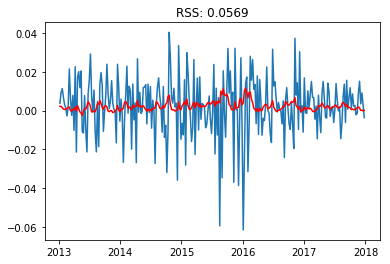

In [8]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(ts_log_diff, order = (1,1))
result_arma = model.fit(disp = -1)
plt.plot(ts_log_diff)
plt.plot(result_arma.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum((result_arma.fittedvalues-ts_log_diff)**2))

In [9]:
print("AIC:", result_arma.aic)
print(result_arma.params)

AIC: -1445.360878227702
const          0.002251
ar.L1.Close    0.760026
ma.L1.Close   -0.862050
dtype: float64


**Volatility section: Residual analysis and arch/garch modeling**

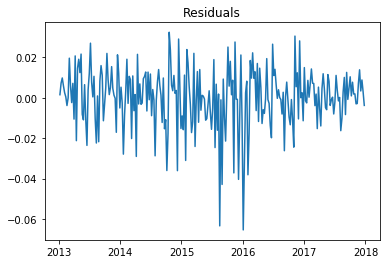

(array([  3.27910934e-04,   2.94357423e-01,   2.32382189e+00,
          7.52030706e+00,   7.54685687e+00,   1.02443500e+01,
          1.32028542e+01,   1.52983635e+01,   1.53028089e+01,
          1.54355923e+01,   1.54418400e+01,   1.54584127e+01,
          1.56117179e+01,   1.57613846e+01,   1.60539022e+01,
          1.82153047e+01,   1.82364309e+01,   1.86073237e+01,
          1.91120869e+01,   2.10825077e+01,   2.13117538e+01,
          2.18833532e+01,   2.44197409e+01,   2.76994799e+01,
          2.81085677e+01,   2.81253295e+01,   2.81267287e+01,
          2.88945298e+01,   3.01033204e+01,   3.33772532e+01,
          3.64403533e+01,   3.64588319e+01,   3.73194059e+01,
          3.75160650e+01,   3.76952956e+01,   3.81723329e+01,
          3.83965317e+01,   3.91760233e+01,   3.93230312e+01,
          3.99848793e+01]),
 array([ 0.98555245,  0.86313971,  0.50797263,  0.11081716,  0.18304104,
         0.11473193,  0.06731745,  0.0535971 ,  0.08294714,  0.11696949,
         0.1631494 ,

In [10]:
plt.plot(result_arma.resid)
test = result_arma.resid
plt.title("Residuals")
plt.show()
from statsmodels.stats.diagnostic import acorr_ljungbox as ljungbox
ljungbox(result_arma.resid)

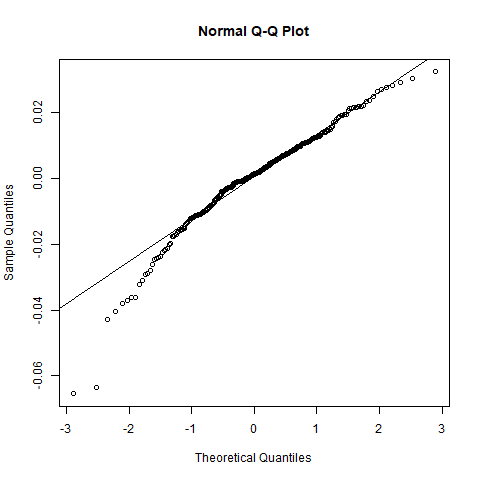

In [11]:
%%R -i test
qqnorm(test)
qqline(test)

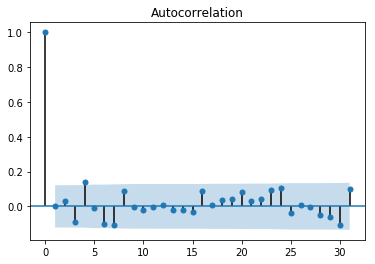

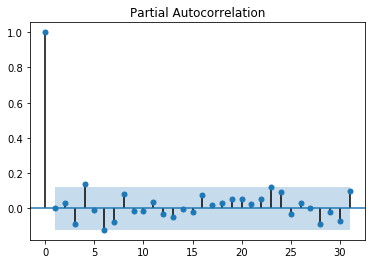

In [14]:
draw_acf_pacf(result_arma.resid)

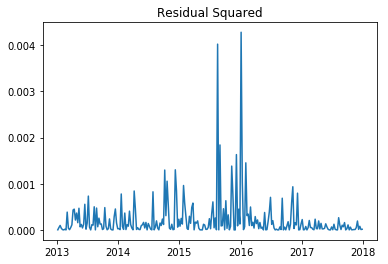

(array([  0.74603866,   5.18063639,   5.18595102,  24.34066182,
         25.33048539,  25.52265351,  29.71095874,  35.81025407,
         36.01528298,  36.0301249 ,  36.03382155,  38.81375131,
         39.08758874,  39.10795627,  39.62679299,  43.34869141,
         43.52362541,  46.69497006,  46.69562869,  69.3797775 ,
         69.99605451,  70.00878073,  70.06440974,  77.84153539,
         77.88890944,  77.99970343,  78.185235  ,  78.53808708,
         78.56237007,  80.11921195,  80.12297553,  80.56698048,
         81.41339789,  81.92182975,  82.57214041,  82.86919108,
         83.6227601 ,  83.68509084,  83.80549236,  83.81043829]),
 array([  3.87733318e-01,   7.49961729e-02,   1.58676420e-01,
          6.82478744e-05,   1.20281013e-04,   2.73151826e-04,
          1.07278329e-04,   1.90216129e-05,   3.93997848e-05,
          8.31785540e-05,   1.67058181e-04,   1.12932731e-04,
          1.93607270e-04,   3.50982524e-04,   5.16186684e-04,
          2.47578392e-04,   4.02467130e-04,   2.

In [15]:
residual = result_arma.resid
residual_2 = residual*residual
plt.plot(residual_2)
plt.title("Residual Squared")
plt.show()
ljungbox(residual_2)

**We are confident to detect Arch/Garch effect**

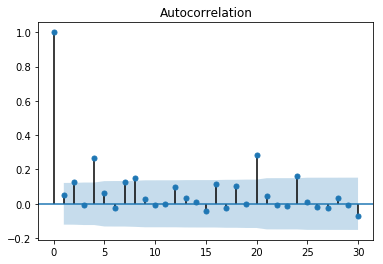

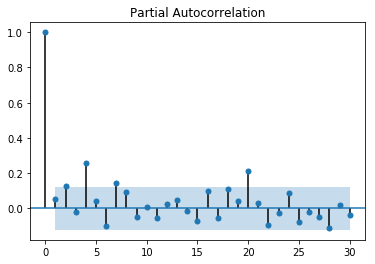

In [16]:
draw_acf_pacf(residual_2, lags = 30)
plt.show()

**We first choose Arch(4) as our model, but the forth param is not significant**

In [19]:
%%R -i residual -o m1
library(fGarch)
m1 = garchFit(~garch(4,0), data = residual, trace = F)

In [20]:
print(m1)



Title:

 GARCH Modelling 



Call:

 garchFit(formula = ~garch(4, 0), data = residual, trace = F) 



Mean and Variance Equation:

 data ~ garch(4, 0)

<environment: 0x000001829d102610>

 [data = residual]



Conditional Distribution:

 norm 



Coefficient(s):

        mu       omega      alpha1      alpha2      alpha3      alpha4  

0.00057654  0.00011801  0.06643506  0.05809806  0.00401168  0.32197314  



Std. Errors:

 based on Hessian 



Error Analysis:

        Estimate  Std. Error  t value Pr(>|t|)    

mu     5.765e-04   7.823e-04    0.737   0.4612    

omega  1.180e-04   2.137e-05    5.522 3.35e-08 ***

alpha1 6.644e-02   5.320e-02    1.249   0.2117    

alpha2 5.810e-02   4.739e-02    1.226   0.2202    

alpha3 4.012e-03   4.289e-02    0.094   0.9255    

alpha4 3.220e-01   1.069e-01    3.011   0.0026 ** 

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Log Likelihood:

 743.112    normalized:  2.858123 



Description:

 Thu May 10 00:59:51 2018 by

**Then we choose arch(3), mu is not significant**

In [30]:
%%R -i residual -o m1
library(fGarch)
m1 = garchFit(~garch(3,0), data = residual, trace = F)

In [31]:
print(m1)



Title:

 GARCH Modelling 



Call:

 garchFit(formula = ~garch(3, 0), data = residual, trace = F) 



Mean and Variance Equation:

 data ~ garch(3, 0)

<environment: 0x000001829dcf0a10>

 [data = residual]



Conditional Distribution:

 norm 



Coefficient(s):

        mu       omega      alpha1      alpha2      alpha3  

0.00024482  0.00016283  0.04856295  0.16564523  0.05502268  



Std. Errors:

 based on Hessian 



Error Analysis:

        Estimate  Std. Error  t value Pr(>|t|)    

mu     2.448e-04   8.916e-04    0.275    0.784    

omega  1.628e-04   3.014e-05    5.402  6.6e-08 ***

alpha1 4.856e-02   4.995e-02    0.972    0.331    

alpha2 1.656e-01   1.053e-01    1.573    0.116    

alpha3 5.502e-02   7.616e-02    0.722    0.470    

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Log Likelihood:

 730.2786    normalized:  2.808764 



Description:

 Thu May 10 01:11:52 2018 by user: charl 





**Arch(2), still not so good...**

In [32]:
%%R -i residual -o m1
library(fGarch)
m1 = garchFit(~garch(2,0), data = residual, trace = F)

In [33]:
print(m1)



Title:

 GARCH Modelling 



Call:

 garchFit(formula = ~garch(2, 0), data = residual, trace = F) 



Mean and Variance Equation:

 data ~ garch(2, 0)

<environment: 0x000001829ee1f548>

 [data = residual]



Conditional Distribution:

 norm 



Coefficient(s):

        mu       omega      alpha1      alpha2  

0.00012692  0.00017906  0.04444161  0.13767627  



Std. Errors:

 based on Hessian 



Error Analysis:

        Estimate  Std. Error  t value Pr(>|t|)    

mu     1.269e-04   8.919e-04    0.142    0.887    

omega  1.791e-04   2.294e-05    7.805    6e-15 ***

alpha1 4.444e-02   4.804e-02    0.925    0.355    

alpha2 1.377e-01   8.941e-02    1.540    0.124    

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Log Likelihood:

 730.0151    normalized:  2.80775 



Description:

 Thu May 10 01:13:16 2018 by user: charl 





**Final touch, Arch(1). Nope, we can not use arch model at all...**

In [42]:
%%R -i residual -o m1
library(fGarch)
m1 = garchFit(~garch(1,0), data = residual, trace = F)

In [41]:
print(m1)



Title:

 GARCH Modelling 



Call:

 garchFit(formula = ~garch(1, 0), data = residual, trace = F, 

    dist = "std") 



Mean and Variance Equation:

 data ~ garch(1, 0)

<environment: 0x000001829d8fcd50>

 [data = residual]



Conditional Distribution:

 norm 



Coefficient(s):

        mu       omega      alpha1  

0.00010888  0.00021080  0.03470921  



Std. Errors:

 based on Hessian 



Error Analysis:

        Estimate  Std. Error  t value Pr(>|t|)    

mu     1.089e-04   9.133e-04    0.119    0.905    

omega  2.108e-04   2.059e-05   10.236   <2e-16 ***

alpha1 3.471e-02   4.658e-02    0.745    0.456    

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Log Likelihood:

 727.1342    normalized:  2.79667 



Description:

 Thu May 10 01:25:33 2018 by user: charl 





**Then we choose garch model, and after several attempts, only the params of garch(1,2) are all significant. Therefore, we choose garch(1,2)** ***with distribution of normal***

In [58]:
%%R -i residual -o m1,resid1
library(fGarch)
m1 = garchFit(~garch(1,2), data = residual, trace = F)
resid1 = residuals(m1, standardize = T)

In [59]:
print(m1)#Garch(1,2) report



Title:

 GARCH Modelling 



Call:

 garchFit(formula = ~garch(1, 2), data = residual, trace = F) 



Mean and Variance Equation:

 data ~ garch(1, 2)

<environment: 0x000001829e49a4a0>

 [data = residual]



Conditional Distribution:

 norm 



Coefficient(s):

        mu       omega      alpha1       beta1       beta2  

5.7654e-04  1.1065e-06  7.7027e-02  9.2010e-01  1.0000e-08  



Std. Errors:

 based on Hessian 



Error Analysis:

        Estimate  Std. Error  t value Pr(>|t|)

mu     5.765e-04   7.965e-04    0.724    0.469

omega  1.107e-06   3.635e-06    0.304    0.761

alpha1 7.703e-02   4.872e-02    1.581    0.114

beta1  9.201e-01   6.416e-01    1.434    0.152

beta2  1.000e-08   6.015e-01    0.000    1.000



Log Likelihood:

 739.4596    normalized:  2.844075 



Description:

 Thu May 10 01:35:31 2018 by user: charl 





**Residual test of garch(1,2)**

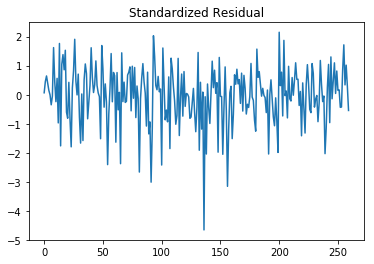

(array([  0.05162126,   0.62502592,   2.82044526,   4.27349196,
          4.86972824,   6.41375997,   7.09668405,   8.85291206,
          9.11006374,   9.11889038,   9.70746926,   9.8083098 ,
          9.85390899,  10.00304461,  11.52156958,  12.79553386,
         12.79610071,  12.82458212,  12.84103388,  14.28546435,
         14.35680399,  14.55887512,  15.78999085,  19.66217092,
         20.66992008,  21.38533738,  21.48468248,  21.81370527,
         23.25262201,  24.97505801,  28.01934967,  28.06873846,
         29.08306712,  29.48225922,  29.50268892,  29.81748806,
         29.94476135,  30.18218433,  30.44814678,  30.99856465]),
 array([ 0.82026579,  0.73160615,  0.42014531,  0.37025622,  0.43198489,
         0.37846972,  0.41888312,  0.35485578,  0.42717705,  0.5208589 ,
         0.55687663,  0.63277314,  0.70583489,  0.76196083,  0.71482154,
         0.68764479,  0.74972521,  0.80188693,  0.84660852,  0.81573226,
         0.85379064,  0.8804636 ,  0.8641104 ,  0.71581653,  0.710

In [60]:
resid1 = np.array(resid1)
plt.plot(resid1)
plt.title('Standardized Residual')
plt.show()
ljungbox(resid1)

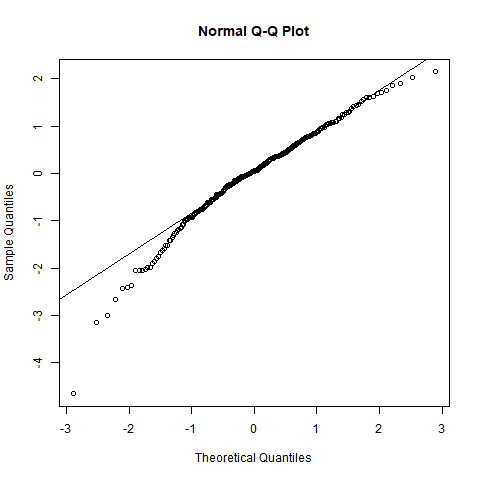

In [61]:
%%R -i resid1
qqnorm(resid1)
qqline(resid1)

**From the QQ plot above, it seems we should suppose the conditional distribution is standard t-distribution instead.**

In [63]:
%%R -i residual -o m1,resid1
library(fGarch)
m1 = garchFit(~garch(1,2), data = residual, trace = F, cond.dist = "std")
resid1 = residuals(m1, standardize = T)

In [64]:
print(m1)



Title:

 GARCH Modelling 



Call:

 garchFit(formula = ~garch(1, 2), data = residual, cond.dist = "std", 

    trace = F) 



Mean and Variance Equation:

 data ~ garch(1, 2)

<environment: 0x000001829d3bf0e0>

 [data = residual]



Conditional Distribution:

 std 



Coefficient(s):

        mu       omega      alpha1       beta1       beta2       shape  

5.7654e-04  3.3429e-06  8.1348e-02  9.0597e-01  1.0000e-08  6.3375e+00  



Std. Errors:

 based on Hessian 



Error Analysis:

        Estimate  Std. Error  t value Pr(>|t|)  

mu     5.765e-04   7.900e-04    0.730   0.4655  

omega  3.343e-06   6.258e-06    0.534   0.5932  

alpha1 8.135e-02   7.115e-02    1.143   0.2529  

beta1  9.060e-01   8.613e-01    1.052   0.2929  

beta2  1.000e-08   7.946e-01    0.000   1.0000  

shape  6.337e+00   2.597e+00    2.440   0.0147 *

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Log Likelihood:

 745.2662    normalized:  2.866408 



Description:

 Thu May 10 01:39

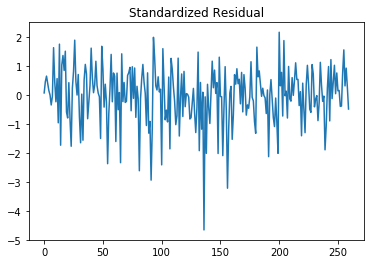

(array([  0.07661273,   0.63325009,   2.8270062 ,   4.50794102,
          5.02618688,   6.61207636,   7.32881224,   9.15856539,
          9.33146371,   9.3342346 ,   9.89700135,   9.9581184 ,
          9.97326593,  10.12681644,  11.65040472,  13.07226064,
         13.07226178,  13.11308512,  13.11864335,  14.5136902 ,
         14.58048193,  14.78150334,  16.0958845 ,  20.17886832,
         21.22079338,  21.8314217 ,  21.93242077,  22.25369863,
         23.7261496 ,  25.49134828,  28.51358   ,  28.57992075,
         29.57060836,  29.92399945,  29.95424522,  30.29174271,
         30.42407671,  30.68293456,  30.87265231,  31.4702011 ]),
 array([ 0.78194132,  0.7286039 ,  0.41907349,  0.34160692,  0.41269268,
         0.35821527,  0.39546531,  0.32909677,  0.40725677,  0.50070434,
         0.53967513,  0.61963503,  0.69611903,  0.75285419,  0.70527464,
         0.66746713,  0.73133526,  0.78481157,  0.83244235,  0.80352566,
         0.84339884,  0.87144288,  0.85113338,  0.6865601 ,  0.680

In [65]:
resid1 = np.array(resid1)
plt.plot(resid1)
plt.title('Standardized Residual')
plt.show()
ljungbox(resid1)

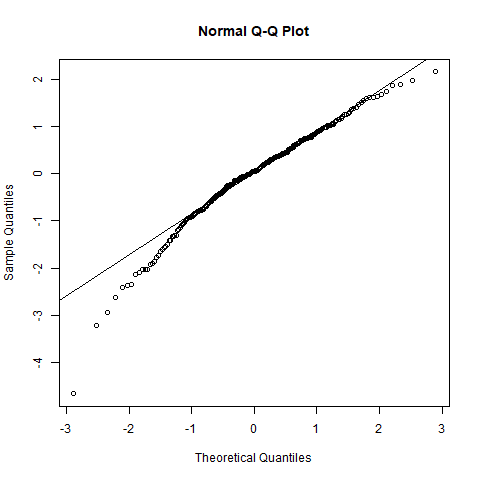

In [66]:
%%R -i resid1
qqnorm(resid1)
qqline(resid1)

**From the QQ-plot above, we believe that the residuals do come from a t-distribution, so we then test the squared residuals.**

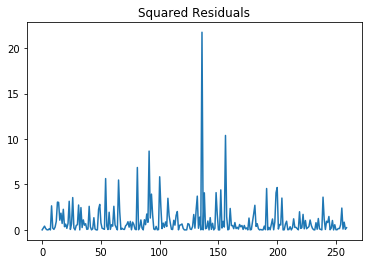

(array([  0.34545972,   1.19178483,   2.26752027,   5.4786418 ,
          5.49756224,   7.09288546,   7.51372699,   7.61535341,
          7.63458847,   7.66130569,   8.31079422,   8.80782373,
          9.21428512,  10.3033254 ,  11.88670875,  14.24402725,
         14.55925648,  14.56190368,  14.72087177,  25.4603414 ,
         25.48761566,  26.07590636,  26.28163954,  28.47005315,
         28.5305622 ,  28.64170476,  28.73983925,  28.83415775,
         28.97443339,  31.17951525,  31.23937037,  31.59535475,
         32.53560022,  33.21502951,  34.12259173,  35.66634088,
         36.43752232,  37.03531299,  37.0457887 ,  37.09165428]),
 array([ 0.55669459,  0.55107056,  0.5187717 ,  0.24161327,  0.35821326,
         0.31234262,  0.37741578,  0.47191555,  0.5713481 ,  0.6618814 ,
         0.68522244,  0.7192513 ,  0.75657378,  0.7396877 ,  0.68758333,
         0.58053985,  0.62719464,  0.69179581,  0.74016541,  0.18438358,
         0.22666305,  0.24843726,  0.2877515 ,  0.24071415,  0.284

In [68]:
resid1_2 = resid1*resid1
plt.plot(resid1_2)
plt.title('Squared Residuals')
plt.show()
ljungbox(resid1_2)

It seems that garch(1,2) perform very well, its residuals do not have further corrolation, so our model for the task is **arma(1,1)+garch(1,2)** with the assumption that the ***conditional distribution of Garch model is standard t-distribution whose degree of freedom is 6.***